In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv("../Data/cleaned_car_data.csv")


In [66]:
X = df.drop(columns=['log_price'])
y = df['log_price']

In [67]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26) #splitting dataset into 80-20


In [68]:
#since we are using multi modal approach, lets start with RandomForest first



rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [69]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, name):

    y_pred = model.predict(X_test) #predicting the test dataset to get rhe results

    y_pred_orig = np.expm1(y_pred)  
    y_test_orig = np.expm1(y_test)

    print(f"--- {name} ---")
    print("MAE :", mean_absolute_error(y_test_orig, y_pred_orig)) #average absolute difference between actual and predicted prices
    print("R²  :", r2_score(y_test_orig, y_pred_orig)) #how much of the variance in price is explained by the model
    print()

evaluate(rf, "Random Forest")
evaluate(xgb, "XGBoost")


--- Random Forest ---
MAE : 76591.52441532974
R²  : 0.9195444801266976

--- XGBoost ---
MAE : 78011.89471476515
R²  : 0.9170980149896119



In [71]:
#From Random Forest, we got a MAE score of 77163 meaning that, the ouput was around Rs.76163 off from the actual output
#From XGBoost, we got a MAE score of 78175 meaning that the output was around Rs.78175 off from the actual output

#From Random Forest, we got a variance of 0.9149 meaning the model explains about 91% of the variance in the actual prices
#From XGBoost, we got a variance of 0.909 meaning the model explains about 90.9% of the variance in the actual price
#Higher variance = better (we want the model to explain as much of the variance as possible)

In [72]:
#Fine tuning by experiementing with new and different values


xgb_final = XGBRegressor(
    subsample=1.0,
    n_estimators=700,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=0.8,
    random_state=42
)

xgb_final.fit(X_train, y_train)

#These are the parameter values that gave the best results


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [77]:
y_pred = xgb_final.predict(X_test)

y_pred_xgb_tuned = np.expm1(y_pred)
y_test_xgb_tuned = np.expm1(y_test)


mae = mean_absolute_error(y_test_xgb_tuned, y_pred_xgb_tuned)
r2 = r2_score(y_test_xgb_tuned, y_pred_xgb_tuned)

print("Final XGBoost Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")

#The best performance that we could get from experimenting



Final XGBoost Model Performance:
MAE  : 75012.32
R²   : 0.9237


In [74]:
#The Final results are
evaluate(rf, "Random Forest")
evaluate(xgb, "XGBoost")
evaluate(xgb_final, "Tuned XGBoost")


--- Random Forest ---
MAE : 76591.52441532974
R²  : 0.9195444801266976

--- XGBoost ---
MAE : 78011.89471476515
R²  : 0.9170980149896119

--- Tuned XGBoost ---
MAE : 75012.32095625934
R²  : 0.9236948879313838



In [81]:
import numpy as np

new_car = np.array([[
    70000,    # km_driven
    0,         # owner
    1000.0,    # engine (cc).
    200,      # max_power (bhp)
    5,         # seats
    4,        # car_age 
    0.00137,     # mileage_per_cc
    1,         # fuel_Diesel 
    0,         # fuel_LPG
    0,         # fuel_Petrol
    0,         # seller_type_Individual
    1,         # seller_type_Trustmark Dealer
    1          # transmission_Manual
]])


predicted_log_price = rf.predict(new_car)

print(f"Predicted log price: {predicted_log_price[0]}")

predicted_price = np.exp(predicted_log_price[0])
print(f"Approx price: {predicted_price}")


Predicted log price: 15.349332050149691
Approx price: 4635858.913404754


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


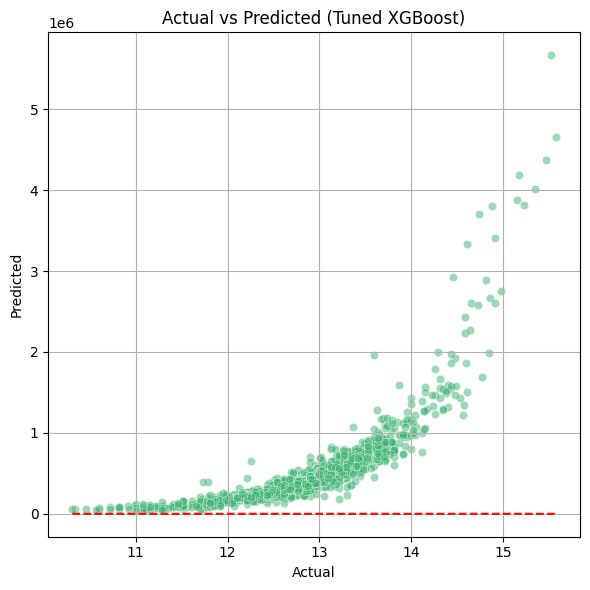

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = y_pred_xgb_tuned
residuals = y_test - y_pred

# Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Tuned XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()



